<a href="https://colab.research.google.com/github/sergiopaniego/BehaviorStudio-experiments/blob/main/BS_lstm_tinypilotnet_1_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/RoboticsLabURJC/2019-phd-sergio-paniego/blob/main/behavior_studio_networks/BS_lstm_tinypilotnet_1_network.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# When using Colab, check the GPU that is assigned and reload the runtime if its memory is low
!nvidia-smi

Mon Feb  8 16:30:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/complete_dataset.zip"
!unzip "/content/drive/My Drive/curves_only.zip"
!unzip "/content/drive/My Drive/complete_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: complete_dataset/Images/4655.png  
  inflating: complete_dataset/Images/13432.png  
  inflating: complete_dataset/Images/13393.png  
  inflating: complete_dataset/Images/14645.png  
  inflating: complete_dataset/Images/16896.png  
  inflating: complete_dataset/Images/4638.png  
  inflating: complete_dataset/Images/12695.png  
  inflating: complete_dataset/Images/13074.png  
  inflating: complete_dataset/Images/16020.png  
  inflating: complete_dataset/Images/15454.png  
  inflating: complete_dataset/Images/690.png  
  inflating: complete_dataset/Images/8168.png  
  inflating: complete_dataset/Images/4244.png  
  inflating: complete_dataset/Images/16078.png  
  inflating: complete_dataset/Images/6062.png  
  inflating: complete_dataset/Images/7468.png  
  inflating: complete_dataset/Images/1326.png  
  inflating: complete_dataset/Images/2106.png  
  inflating: complete_dataset/Images/585.png  
  inflating: complete_dataset/

/content/complete_dataset/Test/Images/1.png
/content/complete_dataset/Train/Images/1.png
/content/curves_only/Images/1.png
data.json  Images  Test  Train	Train_balanced_bbdd_v  Train_balanced_bbdd_w
Test:
5203
Train:
12138
Curves only
5268
Complete dataset
17341


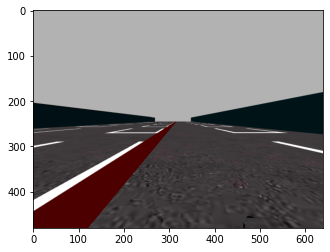

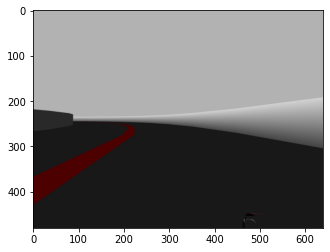

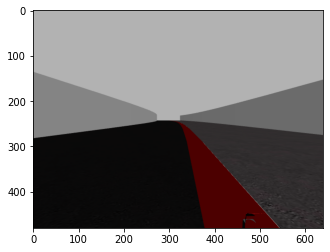

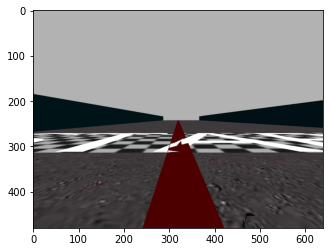

In [ ]:
!ls "/content/complete_dataset/Test/Images/1.png"
!ls "/content/complete_dataset/Train/Images/1.png"
!ls "/content/curves_only/Images/1.png"
!ls "/content/complete_dataset"

import os, os.path
folder = "/content/complete_dataset/Test/Images/"
# print(os.listdir(folder) )
print('Test:')
print(len([name for name in os.listdir(folder) if True]))
folder = "/content/complete_dataset/Train/Images/"
print('Train:')
print(len([name for name in os.listdir(folder) if True]))
folder = "/content/curves_only/Images/"
print('Curves only')
print(len([name for name in os.listdir(folder) if True]))
folder = "/content/complete_dataset/Images/"
print('Complete dataset')
print(len([name for name in os.listdir(folder) if True]))


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/complete_dataset/Test/Images/1.png")
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread("/content/complete_dataset/Train/Images/1.png")
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread("/content/curves_only/Images/1.png")
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread("/content/complete_dataset/Images/1.png")
imgplot = plt.imshow(img)
plt.show()



In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,BatchNormalization,Dropout,ConvLSTM2D,Reshape,Activation,MaxPooling2D, LSTM, Input
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Adam



# BEST MODEL
# LSTM tinypilotnet
def lstm_tinypilotnet_model(img_shape, type_image):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), strides=(2, 2), input_shape=img_shape, activation="relu"))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), activation="relu"))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu"))
    if type_image == 'cropped':
        model.add(Reshape((1, 6, 19, 32)))
    else:
        model.add(Reshape((1, 14, 19, 32)))

    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=img_shape))
    if type_image == 'cropped':
        model.add(Reshape((6, 19, 32)))
    else:
        model.add(Reshape((14, 19, 40)))
    model.add(Conv2D(1, (3, 3), strides=(2, 2), activation="relu"))
    model.add(Flatten())
    model.add(Dense(2))
    adam = Adam(lr=0.00001)
    # model.compile(optimizer=adam, loss="mse", metrics=['accuracy', 'mse', 'mae'])
    model.compile(optimizer=adam, loss="mse", metrics=['mse', 'mae'])
    return model

'''
# LSTM tinypilotnet
def lstm_tinypilotnet_model(img_shape, type_image):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), strides=(2, 2), input_shape=img_shape, activation="relu"))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), activation="relu"))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu"))
    if type_image == 'cropped':
        model.add(Reshape((1, 6, 19, 32)))
    else:
        model.add(Reshape((1, 14, 19, 32)))

    # model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=img_shape))
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=(1, 14, 19, 32)))
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=(1, 14, 19, 32)))
    if type_image == 'cropped':
        model.add(Reshape((6, 19, 32)))
    else:
        model.add(Reshape((14, 19, 40)))
    model.add(Conv2D(1, (3, 3), strides=(2, 2), activation="relu"))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2))
    adam = Adam(lr=0.00001)
    model.compile(optimizer=adam, loss="mean_squared_error", metrics=['accuracy', 'mse', 'mae'])
    return model
'''

'\n# LSTM tinypilotnet\ndef lstm_tinypilotnet_model(img_shape, type_image):\n    model = Sequential()\n    model.add(Conv2D(8, (3, 3), strides=(2, 2), input_shape=img_shape, activation="relu"))\n    model.add(Conv2D(16, (3, 3), strides=(2, 2), activation="relu"))\n    model.add(Conv2D(32, (3, 3), strides=(2, 2), activation="relu"))\n    if type_image == \'cropped\':\n        model.add(Reshape((1, 6, 19, 32)))\n    else:\n        model.add(Reshape((1, 14, 19, 32)))\n\n    # model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=img_shape))\n    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=(1, 14, 19, 32)))\n    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, input_shape=(1, 14, 19, 32)))\n    if type_image == \'cropped\':\n        model.add(Reshape((6, 19, 32)))\n    else:\n        model.add(Reshape((14, 19, 40)))\n    model.add(Conv2D(1

In [ ]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split


def load_data(folder):
    name_folder = '/content/' + folder + '/Images/'
    list_images = glob.glob(name_folder + '*')
    print(list_images)
    images = sorted(list_images, key=lambda x: int(x.split('/')[4].split('.png')[0]))
    name_file = '/content/' + folder + '/data.json'
    file = open(name_file, 'r')
    data = file.read()
    file.close()
    return images, data

def get_images(list_images, type_image, array_imgs):
    # Read the images
    for name in list_images:
        img = cv2.imread(name)
        # CHANGE BGR TO RGB IF NEEDED
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if type_image == 'cropped':
            img = img[240:480, 0:640]
        img = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))
        array_imgs.append(img)
    return array_imgs

def parse_json(data, array):
    # Process json
    data_parse = data.split('}')[:-1]
    for d in data_parse:
        v = d.split('"v": ')[1]
        d_parse = d.split(', "v":')[0]
        w = d_parse.split(('"w": '))[1]
        array.append((float(v), float(w)))

    return array

def preprocess_data(array_ann, array_imgs):
    # Data augmentation
    # Take the image and just flip it and negate the measurement
    print(len(array_ann))
    flip_imgs = []
    array_flip = []
    for i in range(len(array_ann)):
        flip_imgs.append(cv2.flip(array_imgs[i], 1))
        array_flip.append((array_ann[i][0], -array_ann[i][1]))
    new_array_ann = array_ann + array_flip
    new_array_imgs = array_imgs + flip_imgs
    print(len(array_ann))
    return new_array_ann, new_array_imgs

def add_extreme_data(array_ann, array_imgs):
    print(len(array_ann))
    # Adds extreme data (repeated images with intense curve)
    for i in range(0, len(array_ann)):
        if abs(array_ann[i][1]) >= 1:
            if abs(array_ann[i][1]) >= 2:
                num_iter = 10
            else:
                num_iter = 5
            for j in range(0, num_iter):
                array_ann.append(array_ann[i])
                array_imgs.append(array_imgs[i])
        if float(array_ann[i][0]) <= 2:
            # print(array_ann[i][0])
            print(i)
            array_ann.append(array_ann[i])
            array_imgs.append(array_imgs[i])
    print(len(array_ann))
    return array_ann, array_imgs


# Load data
images, data = load_data('complete_dataset')
images_curve, data_curve = load_data('curves_only')

# CHANGE type_image
type_image = 'cropped'
#type_image='normal'

# Preprocess images
array_imgs = []
array_imgs = get_images(images, type_image, array_imgs)
array_imgs = get_images(images_curve, type_image, array_imgs)
# Preprocess json
array_annotations = []
array_annotations = parse_json(data, array_annotations)
array_annotations = parse_json(data_curve, array_annotations)


if type_image == 'cropped':
    img_shape = (65, 160, 3)
else:
    img_shape = (120, 160, 3)


# Adapt the data
array_annotations, array_imgs = preprocess_data(array_annotations, array_imgs)
# x = x[:]
array_annotations, array_imgs = add_extreme_data(array_annotations, array_imgs)

'''
# START NORMALIZE DATA
array_annotations_v = []
array_annotations_w = []

for annotation in array_annotations:
  array_annotations_v.append(annotation[0])
  array_annotations_w.append(annotation[1])
  
array_annotations_v = np.stack(array_annotations_v, axis=0)
array_annotations_v = array_annotations_v.reshape(-1, 1)

array_annotations_w = np.stack(array_annotations_w, axis=0)
array_annotations_w = array_annotations_w.reshape(-1, 1)

def normalize(x):
    x = np.asarray(x)
    return (x - x.min()) / (np.ptp(x))
normalized_X = normalize(array_annotations_v)
normalized_Y = normalize(array_annotations_w)


normalized_annotations = []
for i in range(0, len(normalized_X)):
  normalized_annotations.append([normalized_X.item(i), normalized_Y.item(i)])

normalized_annotations = np.stack(normalized_annotations, axis=0)
array_annotations = normalized_annotations
# END NORMALIZE DATA
'''

# images_train, images_validation, annotations_train, annotations_validation = train_test_split(array_imgs, array_annotations, test_size=0.20, random_state=42)
# FOR LSTMs, shuffle = FALSE!!!!!!!
images_train, images_validation, annotations_train, annotations_validation = train_test_split(array_imgs, array_annotations, test_size=0.20, random_state=42, shuffle=False)


# Adapt the data
images_train = np.stack(images_train, axis=0)
annotations_train = np.stack(annotations_train, axis=0)
images_validation = np.stack(images_validation, axis=0)
annotations_validation = np.stack(annotations_validation, axis=0)



['/content/complete_dataset/Images/11663.png', '/content/complete_dataset/Images/11435.png', '/content/complete_dataset/Images/3042.png', '/content/complete_dataset/Images/10654.png', '/content/complete_dataset/Images/7968.png', '/content/complete_dataset/Images/5052.png', '/content/complete_dataset/Images/12190.png', '/content/complete_dataset/Images/11899.png', '/content/complete_dataset/Images/3879.png', '/content/complete_dataset/Images/11042.png', '/content/complete_dataset/Images/8984.png', '/content/complete_dataset/Images/12507.png', '/content/complete_dataset/Images/9410.png', '/content/complete_dataset/Images/14421.png', '/content/complete_dataset/Images/9821.png', '/content/complete_dataset/Images/12504.png', '/content/complete_dataset/Images/7514.png', '/content/complete_dataset/Images/1157.png', '/content/complete_dataset/Images/15705.png', '/content/complete_dataset/Images/10068.png', '/content/complete_dataset/Images/13287.png', '/content/complete_dataset/Images/12668.pn

complete:
17341
curves:
5268
22609
45218
(13.0, 0.49860000000000004)


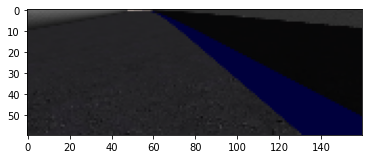

(11.0, -0.056999999999999995)


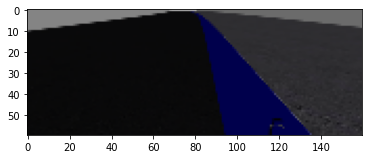

(5.0, -1.4309999999999998)


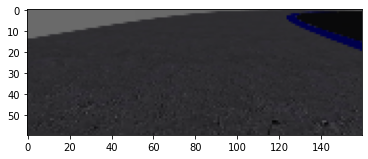

(13.0, -0.029500000000000002)


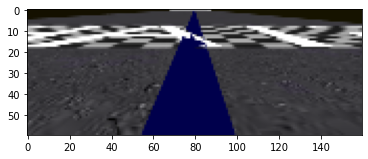

(13.0, -0.49860000000000004)


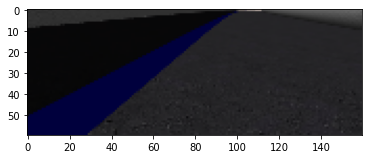

(11.0, 0.056999999999999995)


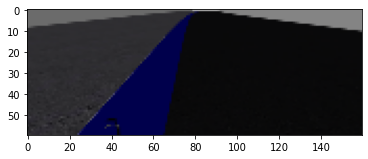

In [ ]:
folder = "/content/complete_dataset/Images/"
print('complete:')
images_1 = len([name for name in os.listdir(folder) if True])
print(images_1)
folder = "/content/curves_only/Images/"
print('curves:')
images_2 = len([name for name in os.listdir(folder) if True])
print(images_2)

print(images_1+images_2)

'''
Todas las imágenes son 17406 (curves + complete)
Se suman el doble de imágenes a partir de 17406 haciendo un flip. 
Así que debería de haber cambios en:
* 17341
* 17341 + 5268
* 17341 + 5268 + 17341
* 17341 + 5268 + 17341 + 5268

'''

print(len(array_imgs))

'''
print(array_annotations[0])
plt.imshow(array_imgs[0])
plt.show()
print(array_annotations[1])
plt.imshow(array_imgs[1])
plt.show()
'''
######
'''
for i in range(17330, 17350):
  print(i)
  print(array_annotations[i])
  plt.imshow(array_imgs[i])
  plt.show()
'''

# Cambio de contexto 1 entre imagenes complete_dataset y curves_only
print(array_annotations[17340])
plt.imshow(array_imgs[17340])
plt.show()
print(array_annotations[17341])
plt.imshow(array_imgs[17341])
plt.show()

# Cambio de contexto 2 entre curves_only y flip de complete_dataset
print(array_annotations[22608])
plt.imshow(array_imgs[22608])
plt.show()
print(array_annotations[22609])
plt.imshow(array_imgs[22609])
plt.show()

# Cambio de contexto 3 entre flip de complete_dataset y flip de curves_only
print(array_annotations[39949])
plt.imshow(array_imgs[39949])
plt.show()
print(array_annotations[39950])
plt.imshow(array_imgs[39950])
plt.show()

# Cambio de contexto 4

In [ ]:
print(images_train[0].shape)
print(annotations_train[0])
print(img_shape)
img_shape = (60, 160, 3)
print(img_shape)

model = lstm_tinypilotnet_model(img_shape, 'cropped')
batch_size = 64  # 16
nb_epoch = 300  # 223


if type_image == 'cropped':
    model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_cropped_shuffle_norm_300_red.h5'
else:
    model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_150.h5'

# Print layers
print(model.summary())

import datetime
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping=EarlyStopping(monitor="mae", patience=40, verbose=1, mode='auto')
checkpoint_path = "/content/drive/My Drive/model_cp.ckpt"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor='val_mse', mode='min', save_best_only=True)

# Train
model_history = model.fit(images_train, annotations_train, epochs=nb_epoch, batch_size=batch_size, verbose=2, validation_data=(images_train, annotations_train), callbacks=[tensorboard_callback, earlystopping, model_checkpoint_callback])

# Save the model
model.save(model_file)


# Evaluate the model
score = model.evaluate(images_validation, annotations_validation, verbose=0)
#print('Evaluating')
#print('Test loss: ', score[0])
#print('Test accuracy: ', score[1])
#print('Test mean squared error: ', score[2])
#print('Test mean absolute error: ', score[3])

print('Evaluating')
print('Test loss: ', score[0])
print('Test mean squared error: ', score[1])
print('Test mean absolute error: ', score[2])




(60, 160, 3)
[1.         0.50473698]
(60, 160, 3)
(60, 160, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 79, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 39, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 19, 32)         4640      
_________________________________________________________________
reshape (Reshape)            (None, 1, 6, 19, 32)      0         
_________________________________________________________________
conv_lst_m2d (ConvLSTM2D)    (None, 1, 6, 19, 32)      73856     
_________________________________________________________________
reshape_1 (Reshape)          (None, 6, 19, 32)         0         
___________________________________________________________

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

%matplotlib inline

# Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(model_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model_history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

# Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(model_history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()


In [ ]:
from keras.models import load_model
import datetime
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

img_shape = (60, 160, 3)
print(img_shape)

#model = lstm_tinypilotnet_model(img_shape, 'cropped')
batch_size = 64  # 16
nb_epoch = 300  # 223

if type_image == 'cropped':
    # model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1000.h5'
    # model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1200.h5'
    # model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1700.h5'
    model_file = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_2000.h5'

# Continue from checkpoint
# filepath = '/content/drive/My Drive/model_lstm_tinypilotnet_cropped_shuffle_1000.h5'
# filepath = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1000.h5'
# filepath = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1200.h5'
filepath = '/content/drive/My Drive/model_lstm_tinypilotnet_checkpoint_1700.h5'
# load the model
new_model = load_model(filepath)
# assert_allclose(model.predict(x_train), new_model.predict(x_train), 1e-5)
# Print layers
print(new_model.summary())


# fit the model
filepath = "model_checkpoint.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mse', verbose=1, save_best_only=True, mode='min')
#callbacks_list = [checkpoint]
#new_model.fit(x_train, y_train, epochs=5, batch_size=50, callbacks=callbacks_list)

from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping=EarlyStopping(monitor="mae", patience=40, verbose=1, mode='auto')
#checkpoint_path = "/content/drive/My Drive/model_cp.ckpt"
#model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor='val_mse', mode='min', save_best_only=True)

# Train
model_history = new_model.fit(images_train, annotations_train, epochs=nb_epoch, batch_size=batch_size, verbose=2, validation_data=(images_train, annotations_train), callbacks=[tensorboard_callback, earlystopping, checkpoint])

# Save the model
new_model.save(model_file)


# Evaluate the model
score = new_model.evaluate(images_validation, annotations_validation, verbose=0)
print('Evaluating')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print('Test mean squared error: ', score[2])
print('Test mean absolute error: ', score[3])

(60, 160, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 79, 8)         224       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 39, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 19, 32)         4640      
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 6, 19, 32)      0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 6, 19, 32)      73856     
_________________________________________________________________
reshape_3 (Reshape)          (None, 6, 19, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 9,

LSTM MODEL

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_4 (Conv2D)            (None, 29, 79, 8)         224       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 39, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 19, 32)         4640      
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 6, 19, 32)      0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 6, 19, 32)      73856     
_________________________________________________________________
reshape_3 (Reshape)          (None, 6, 19, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 9, 1)           289       
_________________________________________________________________
flatten_1 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 38        
=================================================================
Total params: 80,215
Trainable params: 80,215
Non-trainable params: 0
_________________________________________________________________



TINYPILOTNET
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
batch_normalization_6 (Batch (None, 60, 160, 3)        12        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 29, 79, 8)         224       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 39, 8)         584       
_________________________________________________________________
dropout (Dropout)            (None, 14, 39, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4368)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 50)                218450    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
=================================================================
Total params: 219,791
Trainable params: 219,785
Non-trainable params: 6
_________________________________________________________________



PILOTNET 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
batch_normalization_8 (Batch (None, 60, 160, 3)        12        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 80, 24)        1824      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 40, 36)        21636     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 20, 48)         43248     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 20, 64)         27712     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 20, 64)         36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 10240)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 1164)              11920524  
_________________________________________________________________
dense_37 (Dense)             (None, 100)               116500    
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
=================================================================
Total params: 12,173,955
Trainable params: 12,173,949
Non-trainable params: 6
_________________________________________________________________
None

